# Code for TF-IDF for the generated responses from fine-tuned LLMs

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# group data by party and time period
groups = [('democrat', '2016'), ('republican', '2016'), ('democrat', '1976'), ('republican', '1976')]
grouped_texts = {}

# read in data
debate_files = ['../experiment_2_data/dem_2016_results.csv', 
                '../experiment_2_data/rep_2016_results.csv', 
                '../experiment_2_data/dem_1976_results.csv', 
                '../experiment_2_data/rep_1976_results.csv']

dfs = [pd.read_csv(file) for file in debate_files]

In [3]:
dfs[0].head(20)

,Question,Model_Response
0,Why do you believe you are fit to be the next ...,I know how to do the job. I know how to get th...
1,What is your overarching vision for the country?,"Look, for 47 years, Ive worked with presidents..."
2,What is your plan to manage inflation and ensu...,Thats my plan. Thats his plan.
3,How will you create jobs and reduce unemployme...,And were going to create jobs and were going t...
4,What steps will you take to balance the federa...,"in the 10 years period of time, we will have a..."
5,How will you ensure that all Americans have ac...,And we will. And were going to make sure we ha...
6,How will your administration address the press...,But we have to deal with the environmental sus...
7,What are your top priorities in regards to for...,And we've got to strengthen our national defen...
8,What reforms would you propose to improve the ...,What would you do to reform education?
9,How will you restore trust in government and e...,I will restore trust and transparency.


#### Get the top-10 most common words for each party and each time period

In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# preprocessing function
def preprocess(text):
    text = re.sub(r'[^a-z\s]', '', text.lower()) 
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)

# preprocess and group texts by party and time period
for group, df in zip(groups, dfs):
    party, year = group
    key = f"{party}_{year}"
    df['cleaned_response'] = df['Model_Response'].apply(preprocess) 
    grouped_texts[key] = df['cleaned_response']

In [5]:
df.head()

,Question,Model_Response,cleaned_response
0,Why do you believe you are fit to be the next ...,Yes. I believe I am fit for the job because I...,yes believe fit job ive spent lifetime prepari...
1,What is your overarching vision for the country?,What do you see the United States looking like...,see united state looking like win election ree...
2,What is your plan to manage inflation and ensu...,"I dont think, Mr. Trewhitt, that Ive been over...",dont think mr trewhitt ive overly tolerant inf...
3,How will you create jobs and reduce unemployme...,"Well, Im going to do it just the way I have fo...",well im going way last five year californiacre...
4,What steps will you take to balance the federa...,Yes. Economic strength not only strength at ho...,yes economic strength strength home strength a...


In [6]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_results = {}

# Calculate TF-IDF
for key, texts in grouped_texts.items():
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    
    # calculate mean TF-IDF scores for all terms
    mean_scores = tfidf_matrix.toarray().mean(axis=0)
    all_terms = {feature_names[i]: mean_scores[i] for i in range(len(feature_names))}
    
    sorted_terms = sorted(all_terms.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Store full results and top 10 separately
    tfidf_results[key] = all_terms  
    top_terms = sorted_terms   
    
    # print the top 10 terms
    print(f"Top terms for {key}:")
    for term, score in top_terms:
        print(f"{term}: {score:.2f}")

Top terms for democrat_2016:
going: 0.08
im: 0.06
country: 0.05
make: 0.05
sure: 0.04
job: 0.04
plan: 0.04
know: 0.03
youre: 0.03
american: 0.03
Top terms for republican_2016:
going: 0.06
im: 0.04
country: 0.04
people: 0.04
american: 0.04
ill: 0.04
want: 0.03
great: 0.03
thing: 0.03
make: 0.03
Top terms for democrat_1976:
uh: 0.10
people: 0.06
american: 0.05
im: 0.05
year: 0.04
president: 0.04
ive: 0.04
country: 0.03
answer: 0.03
question: 0.03
Top terms for republican_1976:
uh: 0.10
people: 0.05
job: 0.05
mr: 0.04
thing: 0.04
year: 0.04
think: 0.04
right: 0.04
president: 0.04
believe: 0.04


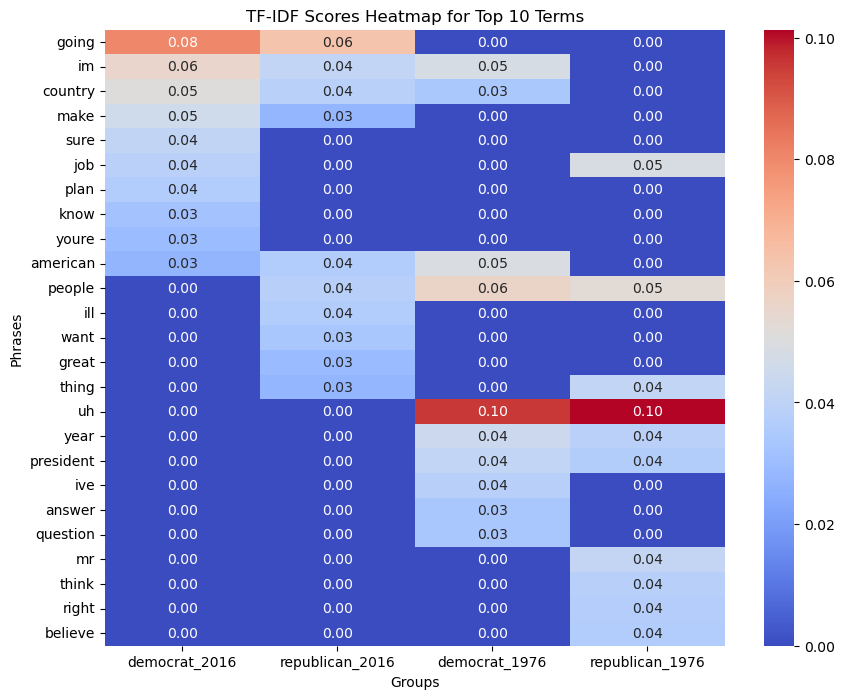

In [ ]:
heatmap_data = []

for key, terms in tfidf_results.items():
    # extract the top 10 terms and their scores
    top_terms = sorted(terms.items(), key=lambda x: x[1], reverse=True)[:10]
    top_terms_dict = {term: score for term, score in top_terms}
    
    heatmap_data.append(pd.Series(top_terms_dict, name=key))

#  fill missing scores with 0
heatmap_df = pd.concat(heatmap_data, axis=1).fillna(0) 
heatmap_df.index.name = "Phrase"

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, cbar=True, fmt=".2f")
plt.title("TF-IDF Scores Heatmap for Top 10 Terms")
plt.xlabel("Groups")
plt.ylabel("Phrases")
plt.show()

#### Find the shared phrases among 10 for all groups and the unique ones for each party and time period

In [8]:
unique_phrases = {}
shared_phrases = set(heatmap_df[heatmap_df.columns[0]][heatmap_df[heatmap_df.columns[0]] > 0].index)

for group in heatmap_df.columns:
    # Get phrases in the current group
    group_phrases = set(heatmap_df[group][heatmap_df[group] > 0].index)
    shared_phrases &= group_phrases

    # Get phrases in all other groups
    other_phrases = set().union(
        *[set(heatmap_df[other_group][heatmap_df[other_group] > 0].index)
          for other_group in heatmap_df.columns if other_group != group]
    )
    
    # Calculate unique phrases for the current group
    unique_phrases[group] = group_phrases - other_phrases

print("Shared Phrases Across All Groups:")
print(shared_phrases)

# Print unique phrases for each group
for group, phrases in unique_phrases.items():
    print(f"Unique Phrases for {group}:")
    print(phrases)


Shared Phrases Across All Groups:
set()
Unique Phrases for democrat_2016:
{'youre', 'plan', 'know', 'sure'}
Unique Phrases for republican_2016:
{'ill', 'want', 'great'}
Unique Phrases for democrat_1976:
{'question', 'ive', 'answer'}
Unique Phrases for republican_1976:
{'believe', 'think', 'mr', 'right'}


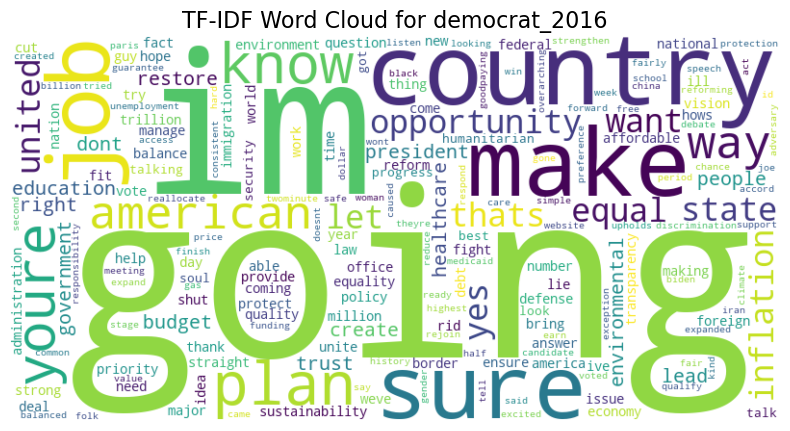

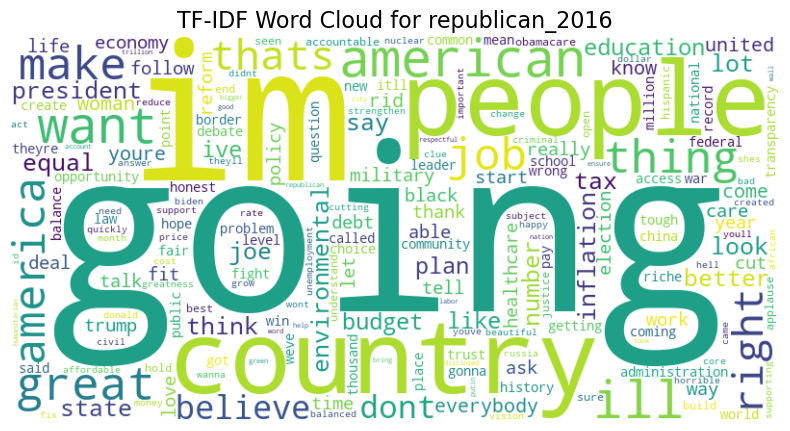

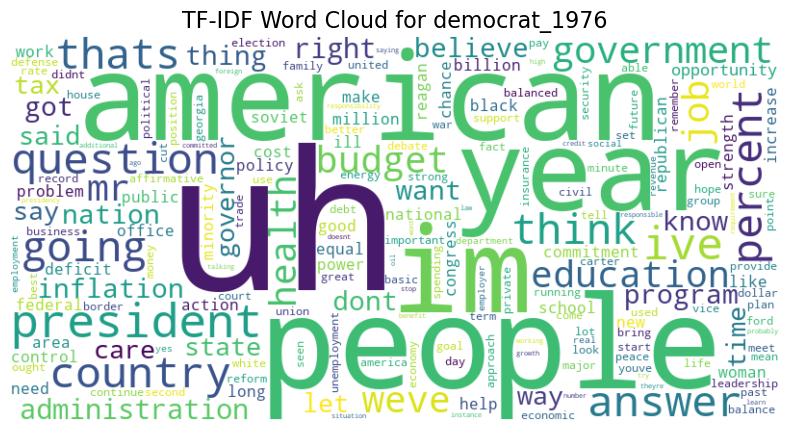

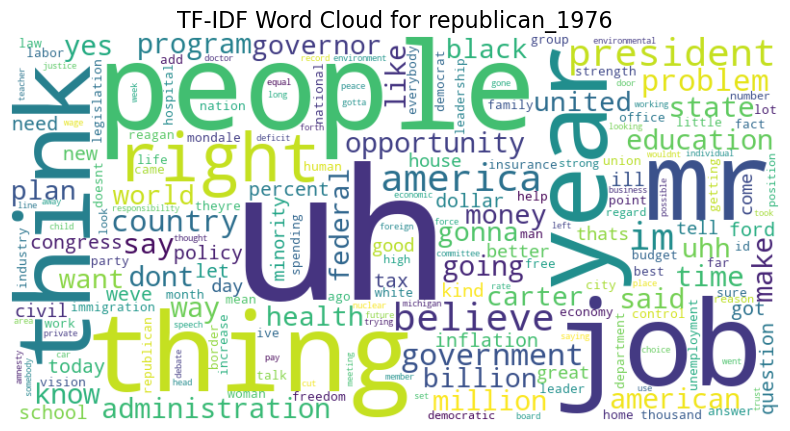

In [ ]:
# Generate and display a word cloud for TF-IDF
def plot_tfidf_wordcloud(tfidf_terms, title):
    tfidf_dict = tfidf_terms
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for key, terms in tfidf_results.items():
    plot_tfidf_wordcloud(terms, title=f"TF-IDF Word Cloud for {key}")

#### Perform the same analysis on bi-grams and tri-grams

In [10]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(2, 3))

tfidf_results = {}

for key, texts in grouped_texts.items():
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top-10 phrases for the group
    scores = np.argsort(tfidf_matrix.toarray().mean(axis=0))[-10:][::-1]
    top_phrases = [(feature_names[i], tfidf_matrix[:, i].toarray().mean()) for i in scores]
    tfidf_results[key] = top_phrases

for key, phrases in tfidf_results.items():
    print(f"Top phrases for {key}:")
    for phrase, score in phrases:
        print(f"{phrase}: {score:.2f}")

Top phrases for democrat_2016:
im going: 0.05
make sure: 0.03
going make: 0.03
youre going: 0.02
going make sure: 0.02
environmental sustainability: 0.02
united state: 0.02
equal opportunity: 0.02
lead country: 0.02
im going make: 0.02
Top phrases for republican_2016:
im going: 0.04
american people: 0.03
united state: 0.01
america great: 0.01
make america: 0.01
make america great: 0.01
believe equal: 0.01
want make: 0.01
youre going: 0.01
come country: 0.01
Top phrases for democrat_1976:
american people: 0.05
uh uh: 0.03
weve got: 0.03
health care: 0.03
answer question: 0.02
federal government: 0.02
im going: 0.02
united state: 0.02
civil right: 0.02
affirmative action: 0.02
Top phrases for republican_1976:
united state: 0.04
american people: 0.03
uh uh: 0.02
civil right: 0.02
mr carter: 0.02
im going: 0.02
health insurance: 0.02
mr mondale: 0.02
white house: 0.02
federal government: 0.02


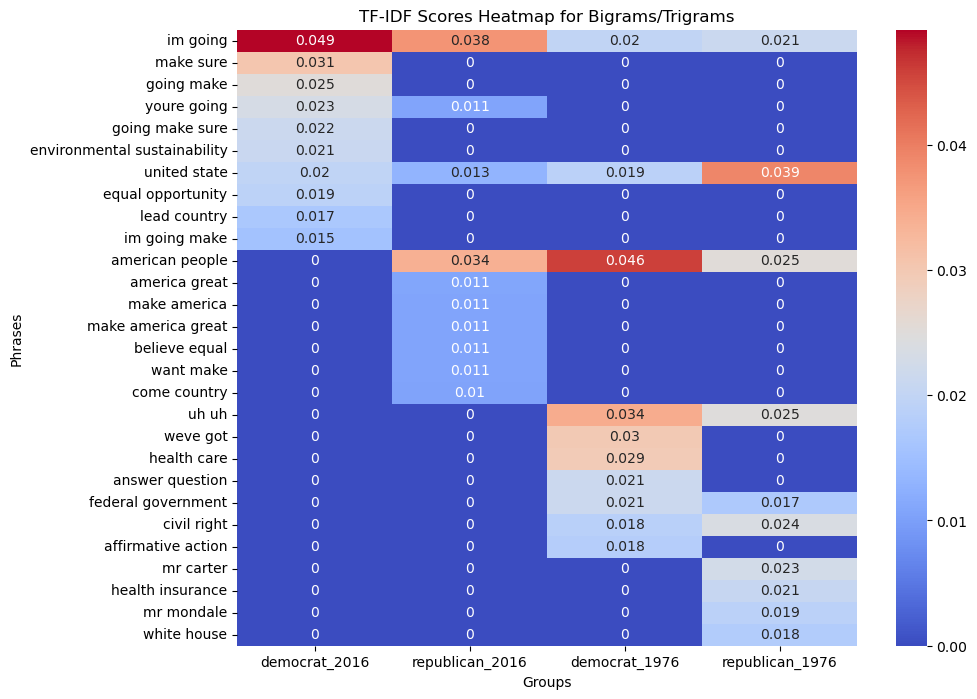

In [13]:
heatmap_data = []

for key, phrases in tfidf_results.items():
    scores = {phrase: score for phrase, score in phrases}
    heatmap_data.append(pd.Series(scores, name=key))

# Combine into a DataFrame
heatmap_df = pd.concat(heatmap_data, axis=1).fillna(0)  # fill missing scores with 0
heatmap_df.index.name = "Phrase"

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, cbar=True)
plt.title("TF-IDF Scores Heatmap for Bigrams/Trigrams")
plt.xlabel("Groups")
plt.ylabel("Phrases")
plt.show()

In [ ]:
unique_phrases = {}
shared_phrases = set(heatmap_df[heatmap_df.columns[0]][heatmap_df[heatmap_df.columns[0]] > 0].index)

for group in heatmap_df.columns:
    group_phrases = set(heatmap_df[group][heatmap_df[group] > 0].index)
    shared_phrases &= group_phrases # find shared phrases

    # Get phrases in all other groups
    other_phrases = set().union(
        *[set(heatmap_df[other_group][heatmap_df[other_group] > 0].index)
          for other_group in heatmap_df.columns if other_group != group]
    )
    
    # calculate unique phrases combination
    unique_phrases[group] = group_phrases - other_phrases

print("Shared Phrases Across All Groups:")
print(shared_phrases)

for group, phrases in unique_phrases.items():
    print(f"Unique Phrases for {group}:")
    print(phrases)


Shared Phrases Across All Groups:
{'united state', 'im going'}
Unique Phrases for democrat_2016:
{'make sure', 'going make sure', 'going make', 'im going make', 'environmental sustainability', 'equal opportunity', 'lead country'}
Unique Phrases for republican_2016:
{'america great', 'make america', 'come country', 'believe equal', 'make america great', 'want make'}
Unique Phrases for democrat_1976:
{'answer question', 'health care', 'affirmative action', 'weve got'}
Unique Phrases for republican_1976:
{'mr carter', 'health insurance', 'white house', 'mr mondale'}
